In [1]:
import requests
import geopandas as gpd
import pandas as pd
import json

In [2]:
# https://api.census.gov/data/key_signup.html

# api_key = "YOUR_API_KEY"
api_key = "efdd6eb427331f621b5442298a244fb52e00b7f7"

fields = "B19301_001E,B24031_001E,B17001_002E,B23025_005E"
# Request median income data
url = f"https://api.census.gov/data/2021/acs/acs5?get=NAME,{fields}&for=tract:*&in=state:25&key={api_key}"
response = requests.get(url)
income_data = pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [3]:
income_data.sample(10)

,NAME,B19301_001E,B24031_001E,B17001_002E,B23025_005E,state,county,tract
905,"Census Tract 3839.03, Middlesex County, Massac...",63590,70431,94,68,25,017,383903
77,"Census Tract 9222, Berkshire County, Massachus...",34049,40923,509,33,25,003,922200
1229,"Census Tract 107.02, Suffolk County, Massachus...",154225,83529,102,61,25,025,010702
1598,"Census Tract 7543, Worcester County, Massachus...",24716,31204,483,113,25,027,754300
468,"Census Tract 8104.12, Hampden County, Massachu...",39350,54263,311,55,25,013,810412
590,"Census Tract 3124, Middlesex County, Massachus...",22979,36971,633,117,25,017,312400
1050,"Census Tract 4225.01, Norfolk County, Massachu...",42597,53027,184,104,25,021,422501
1440,"Census Tract 7051.02, Worcester County, Massac...",41981,55559,207,205,25,027,705102
1147,"Census Tract 5212.02, Plymouth County, Massach...",45668,58636,51,69,25,023,521202
1177,"Census Tract 5421.02, Plymouth County, Massach...",43554,53000,71,58,25,023,542102


In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         1620 non-null   object
 1   B19301_001E  1618 non-null   object
 2   B24031_001E  1620 non-null   object
 3   B17001_002E  1620 non-null   object
 4   B23025_005E  1620 non-null   object
 5   state        1620 non-null   object
 6   county       1620 non-null   object
 7   tract        1620 non-null   object
dtypes: object(8)
memory usage: 101.4+ KB


In [5]:
# Load the download the Massachusetts census tract geometries
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Census+Tracts

url = "data/tl_2021_25_tract.zip"
tracts = gpd.read_file(url)

In [6]:
tracts.sample(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
91,25,017,321600,25017321600,3216,Census Tract 3216,G5020,S,6502288,855224,+42.3643537,-071.5352637,"POLYGON ((-71.56222 42.37038, -71.56220 42.370..."
1048,25,005,651100,25005651100,6511,Census Tract 6511,G5020,S,690427,0,+41.6506256,-070.9351699,"POLYGON ((-70.94337 41.65233, -70.94277 41.652..."
850,25,017,374500,25017374500,3745,Census Tract 3745,G5020,S,1808934,6125,+42.3541178,-071.2201430,"POLYGON ((-71.23960 42.34449, -71.23943 42.344..."
1424,25,025,061101,25025061101,611.01,Census Tract 611.01,G5020,S,165282,0,+42.3262844,-071.0542968,"POLYGON ((-71.05693 42.32855, -71.05628 42.328..."
1347,25,017,324101,25017324101,3241.01,Census Tract 3241.01,G5020,S,22675015,1555508,+42.5232732,-071.4711882,"POLYGON ((-71.51539 42.51415, -71.51292 42.516..."


In [7]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1620 non-null   object  
 1   COUNTYFP  1620 non-null   object  
 2   TRACTCE   1620 non-null   object  
 3   GEOID     1620 non-null   object  
 4   NAME      1620 non-null   object  
 5   NAMELSAD  1620 non-null   object  
 6   MTFCC     1620 non-null   object  
 7   FUNCSTAT  1620 non-null   object  
 8   ALAND     1620 non-null   int64   
 9   AWATER    1620 non-null   int64   
 10  INTPTLAT  1620 non-null   object  
 11  INTPTLON  1620 non-null   object  
 12  geometry  1620 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 164.7+ KB


<Axes: >

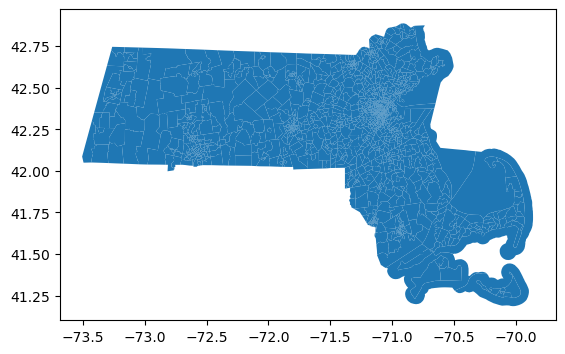

In [8]:
tracts.plot()

In [9]:
# Merge the income data with the geometries
income_data["GEOID"] = income_data["state"] + income_data["county"] + income_data["tract"]
tracts["GEOID"] = tracts["GEOID"].astype(str)
income_tracts = tracts.merge(income_data, on="GEOID")

In [10]:
income_tracts.sample(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,INTPTLON,geometry,NAME_y,B19301_001E,B24031_001E,B17001_002E,B23025_005E,state,county,tract
1255,25,025,030400,25025030400,304,Census Tract 304,G5020,S,165170,0,...,-071.0536706,"POLYGON ((-71.05629 42.36299, -71.05609 42.363...","Census Tract 304, Suffolk County, Massachusetts",102325,74821,259,115,25,025,030400
215,25,021,402200,25021402200,4022,Census Tract 4022,G5020,S,1168220,1705,...,-071.1442327,"POLYGON ((-71.15545 42.24442, -71.15515 42.244...","Census Tract 4022, Norfolk County, Massachusetts",55045,54612,76,40,25,021,402200
1000,25,009,205600,25009205600,2056,Census Tract 2056,G5020,S,1398217,3341,...,-070.9853846,"POLYGON ((-70.99482 42.47489, -70.99413 42.474...","Census Tract 2056, Essex County, Massachusetts",29974,40943,902,57,25,009,205600
446,25,017,352300,25017352300,3523,Census Tract 3523,G5020,S,694885,0,...,-071.0835011,"POLYGON ((-71.08990 42.36496, -71.08969 42.364...","Census Tract 3523, Middlesex County, Massachus...",87768,76673,525,51,25,017,352300
246,25,025,170102,25025170102,1701.02,Census Tract 1701.02,G5020,S,684191,0,...,-071.0225866,"POLYGON ((-71.03301 42.41461, -71.03282 42.415...","Census Tract 1701.02, Suffolk County, Massachu...",29603,45399,230,243,25,025,170102


In [11]:
income_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      1620 non-null   object  
 1   COUNTYFP     1620 non-null   object  
 2   TRACTCE      1620 non-null   object  
 3   GEOID        1620 non-null   object  
 4   NAME_x       1620 non-null   object  
 5   NAMELSAD     1620 non-null   object  
 6   MTFCC        1620 non-null   object  
 7   FUNCSTAT     1620 non-null   object  
 8   ALAND        1620 non-null   int64   
 9   AWATER       1620 non-null   int64   
 10  INTPTLAT     1620 non-null   object  
 11  INTPTLON     1620 non-null   object  
 12  geometry     1620 non-null   geometry
 13  NAME_y       1620 non-null   object  
 14  B19301_001E  1618 non-null   object  
 15  B24031_001E  1620 non-null   object  
 16  B17001_002E  1620 non-null   object  
 17  B23025_005E  1620 non-null   object  
 18  state        1620 no

In [13]:
cols_to_drop = ['STATEFP', 'COUNTYFP','TRACTCE', 'NAME_x', 'NAMELSAD', 'MTFCC', 'NAMELSAD', 'FUNCSTAT', 'MTFCC', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'state', 'county', 'tract']
merged_dropped = income_tracts.drop(cols_to_drop, axis=1)
merged_dropped.sample(5)

,GEOID,geometry,NAME_y,B19301_001E,B24031_001E,B17001_002E,B23025_005E
1190,25023561400,"POLYGON ((-70.98097 42.00675, -70.97983 42.007...","Census Tract 5614, Plymouth County, Massachusetts",43936,58162,392,269
1079,25023545400,"POLYGON ((-70.73319 41.76807, -70.73155 41.767...","Census Tract 5454, Plymouth County, Massachusetts",38259,47842,662,85
181,25013812001,"POLYGON ((-72.63743 42.20720, -72.63676 42.207...","Census Tract 8120.01, Hampden County, Massachu...",23058,31955,980,54
13,25017355000,"POLYGON ((-71.14134 42.39909, -71.14118 42.399...","Census Tract 3550, Middlesex County, Massachus...",79614,86654,259,85
909,25005615100,"POLYGON ((-71.20346 41.88184, -71.19538 41.880...","Census Tract 6151, Bristol County, Massachusetts",42511,50716,290,290


In [15]:
# Convert to GeoJSON and save as a file
merged_dropped.to_file("data/MA_income.json", driver="GeoJSON")